In [2]:
import pickle
with open('/kaggle/input/takeo-data/New_I.pkl', 'rb') as f:
    X = pickle.load(f)
    
with open('/kaggle/input/takeo-data/New_Y.pkl', 'rb') as f:
    Y = pickle.load(f)

In [3]:
import numpy as np
Y = Y.astype(np.float32)

In [4]:
import cv2
import numpy as np
from tensorflow.image import resize

# Supondo que X seja uma lista de imagens coloridas.
X_resized = np.array([resize(image, [100, 100]) for image in X])
#imagens_cinza = np.array([cv2.cvtColor(image.astype('uint8'), cv2.COLOR_BGR2GRAY) for image in X_resized])

'''def converter_para_rgb(imagens_cinza):
    imagens_rgb = np.stack((imagens_cinza,) * 3, axis=-1)
    return imagens_rgb

imagens_rgba = converter_para_rgb(imagens_cinza)



imagens_rgba[0].shape
#X = preprocess_input(imagens_rgba)
'''
X = X_resized
X.shape


# Convertendo a lista em um array NumPy
X = np.array(X)

2024-07-23 02:11:04.356601: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 02:11:04.356744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 02:11:04.492959: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
print(np.min(X))
print(np.max(X))
X.shape

0.0
255.0


(10022, 100, 100, 3)

In [7]:
from keras.applications.resnet50 import preprocess_input 
X = preprocess_input(X)

In [8]:
print(np.min(X))
print(np.max(X))
X.shape

-123.68
151.061


(10022, 100, 100, 3)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [10]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0.0: 6330, 1.0: 1687}
Distribuição no conjunto de teste
{0.0: 1593, 1.0: 412}


In [11]:
'''import os
import cv2
import albumentations as A
from skimage.io import imread, imsave
from pathlib import Path

# transformações
import albumentations as A

transformacoes = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=40, p=1),
    A.HorizontalFlip(p=0.5),
])



novas = 10

index = 0
labels = []
x_train = []

for arquivo in X_train:
    imagem = arquivo
    holder = Y_train[index]
    index += 1
    for i in range(novas):
        imagem_transformada = transformacoes(image=imagem)['image']
        labels.append(holder)
        x_train.append(imagem_transformada)
        
import numpy as np


X_train = np.array(x_train)  
Y_train = np.array(labels)  
'''
import numpy as np
import albumentations as A

# Transformações
transformacoes = A.Compose([
    A.Rotate(limit=20),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=0),
    A.HorizontalFlip(),
    A.RandomScale(scale_limit=0.1),
    A.Resize(width=100, height=100, p=1),  # Garante que todas as imagens tenham o mesmo tamanho
])

novas = 4
labels = []
x_train = []

for index, imagem in enumerate(X_train):
    holder = Y_train[index]
    
    # Redimensionar a imagem original para garantir uniformidade
    imagem_resized = transformacoes(image=imagem)['image']
    
    if Y_train[index] == 0:
        labels.append(holder)
        x_train.append(imagem_resized)
    else:
        for i in range(novas):
            imagem_transformada = transformacoes(image=imagem)['image']
            labels.append(holder)
            x_train.append(imagem_transformada)

# Convertendo as listas para arrays NumPy
X_train = np.stack(x_train)  # Usa np.stack para garantir que as imagens sejam empilhadas corretamente
Y_train = np.array(labels)  # Convertendo para NumPy array


In [12]:
import numpy as np

unique, counts = np.unique(Y_train, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no conjunto de treino")
print(ocorrencias)

unique, counts = np.unique(Y_test, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no conjunto de teste")
print(ocorrencias)

Distribuição no conjunto de treino
{0.0: 6330, 1.0: 6748}
Distribuição no conjunto de teste
{0.0: 1593, 1.0: 412}


In [13]:
# Criando o objeto StratifiedKFold para 3 folds
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Dicionário para armazenar os dados de treino de cada fold
folds = {}

# Dividindo os dados em folds
for i, (train_index, _) in enumerate(kfold.split(X_train, Y_train)):
    folds[f'x_train_{i+1}'] = X_train[train_index]
    folds[f'y_train_{i+1}'] = Y_train[train_index]

# Agora você tem x_train_1, y_train_1, x_train_2, y_train_2, x_train_3, y_train_3 armazenados no dicionário `folds`
x_train_1, y_train_1 = folds['x_train_1'], folds['y_train_1']
x_train_2, y_train_2 = folds['x_train_2'], folds['y_train_2']
x_train_3, y_train_3 = folds['x_train_3'], folds['y_train_3']

In [14]:
import numpy as np

unique, counts = np.unique(y_train_1, return_counts=True)
ocorrencias = dict(zip(unique, counts))
print("Distribuição no FOLD 1")
print(ocorrencias)

unique, counts = np.unique(y_train_2, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 2")
print(ocorrencias)

unique, counts = np.unique(y_train_3, return_counts=True)
ocorrencias = dict(zip(unique, counts))

print("Distribuição no FOLD 3")
print(ocorrencias)

Distribuição no FOLD 1
{0.0: 4220, 1.0: 4498}
Distribuição no FOLD 2
{0.0: 4220, 1.0: 4499}
Distribuição no FOLD 3
{0.0: 4220, 1.0: 4499}


In [22]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

def create_resnet50():
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        predictions = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(x)
        model = Model(inputs=base_model.input, outputs=predictions)

        for layer in base_model.layers:
            layer.trainable = False
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        return model


In [14]:
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.regularizers import l2

scores = []
tempo = []
historys = []
metricas_por_fold = []
melhor_model = None
melhor_f1_score = 0

if(True):
    start_time = time.time()
    tf.keras.backend.clear_session()
    
    n_splits = 3
    hist = []
    holder = []
    metricas_fold = []
    
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
    
    i = 0
    for train_idx, val_idx in kfold.split(X_train, Y_train):
        tf.keras.backend.clear_session()
        early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='min', restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='min', min_lr=1e-5)
        modelo = create_resnet50()
        X_train_fold, Y_train_fold = X_train[train_idx], Y_train[train_idx]
        X_val_fold, Y_val_fold = X_train[val_idx], Y_train[val_idx]
        
        history = modelo.fit(X_train_fold, Y_train_fold, epochs=30, validation_data=(X_val_fold, Y_val_fold), callbacks=[early_stopping, reduce_lr])
        holder.append(modelo.evaluate(X_val_fold, Y_val_fold, verbose=0))

        # Previsão e cálculo das métricas para o conjunto de validação
        previsoes_val = modelo.predict(X_val_fold)
        previsoes_binarias_val = [1 if x > 0.5 else 0 for x in previsoes_val]

        # Relatório de Classificação para o conjunto de validação
        relatorio_dict = classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"], output_dict=True)
        precision_val = relatorio_dict['macro avg']['precision']
        recall_val = relatorio_dict['macro avg']['recall']
        f1_val = relatorio_dict['macro avg']['f1-score']
        
        # Calcular AUC-ROC
        auc_roc_val = roc_auc_score(Y_val_fold, previsoes_val)
        
        print("Relatório de Classificação (Validação):\n", classification_report(Y_val_fold, previsoes_binarias_val, target_names=["Classe 0", "Classe 1"]))
        print(f"F1: {f1_val:.4f}, Recall: {recall_val:.4f}, Precision: {precision_val:.4f}, AUC-ROC: {auc_roc_val:.4f}")
        metricas_fold.append((f1_val, recall_val, precision_val, auc_roc_val))
        
        # Verificar se este é o melhor modelo com base no F1-score
        if f1_val > melhor_f1_score:
            melhor_f1_score = f1_val
            melhor_model = modelo 
            bf = i
        i += 1
        del modelo

    # Guardar histórico e métricas
    hist.append(history)
    historys.append(hist)
    metricas_por_fold.append(metricas_fold)
    
    end_time = time.time()
    tempo.append(end_time - start_time)
    scores.append(holder)

# Exibir as métricas por fold e por fase
print(metricas_por_fold)



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/30
  2/273 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.5781 - loss: 14.1383   

I0000 00:00:1721697684.703115     137 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721697684.764352     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7260 - loss: 8.7216

W0000 00:00:1721697701.853714     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1721697707.361550     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - accuracy: 0.7261 - loss: 8.7111 - val_accuracy: 0.7677 - val_loss: 2.3876 - learning_rate: 0.0010
Epoch 2/30


W0000 00:00:1721697714.560727     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.7795 - loss: 1.8667 - val_accuracy: 0.7415 - val_loss: 1.0194 - learning_rate: 0.0010
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7859 - loss: 0.8753 - val_accuracy: 0.7704 - val_loss: 0.7073 - learning_rate: 0.0010
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7852 - loss: 0.6603 - val_accuracy: 0.7612 - val_loss: 0.6802 - learning_rate: 0.0010
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7834 - loss: 0.6254 - val_accuracy: 0.7665 - val_loss: 0.6341 - learning_rate: 0.0010
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7831 - loss: 0.6135 - val_accuracy: 0.7837 - val_loss: 0.6339 - learning_rate: 0.0010
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7795 - loss: 0.6130 - val_accuracy: 0.7837 - val_loss: 0.5902 - learning_rate: 0.0010
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7855 - loss: 0.5996

W0000 00:00:1721698087.421641     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step


W0000 00:00:1721698094.406569     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.75      0.80      0.78      2110
    Classe 1       0.80      0.75      0.78      2250

    accuracy                           0.78      4360
   macro avg       0.78      0.78      0.78      4360
weighted avg       0.78      0.78      0.78      4360

F1: 0.7766, Recall: 0.7775, Precision: 0.7776, AUC-ROC: 0.8677
Epoch 1/30
  5/273 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.5969 - loss: 14.0488  

W0000 00:00:1721698114.871693     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7149 - loss: 8.9940

W0000 00:00:1721698132.790794     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1721698137.785124     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 46s 112ms/step - accuracy: 0.7150 - loss: 8.9836 - val_accuracy: 0.7795 - val_loss: 2.5942 - learning_rate: 0.0010
Epoch 2/30
  5/273 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7672 - loss: 2.6155

W0000 00:00:1721698145.285730     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7652 - loss: 2.0906 - val_accuracy: 0.7940 - val_loss: 1.0675 - learning_rate: 0.0010
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.7756 - loss: 0.9894 - val_accuracy: 0.7866 - val_loss: 0.7433 - learning_rate: 0.0010
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7751 - loss: 0.7223 - val_accuracy: 0.7889 - val_loss: 0.6513 - learning_rate: 0.0010
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7813 - loss: 0.6401 - val_accuracy: 0.7816 - val_loss: 0.6185 - learning_rate: 0.0010
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7726 - loss: 0.6144 - val_accuracy: 0.7942 - val_loss: 0.5952 - learning_rate: 0.0010
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7820 - loss: 0.6159 - val_accuracy: 0.7614 - val_loss: 0.6188 - learning_rate: 0.0010
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7737 - loss: 0.6109

W0000 00:00:1721698471.858017     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step


W0000 00:00:1721698479.212317     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.88      0.67      0.76      2110
    Classe 1       0.74      0.91      0.82      2249

    accuracy                           0.79      4359
   macro avg       0.81      0.79      0.79      4359
weighted avg       0.81      0.79      0.79      4359

F1: 0.7880, Recall: 0.7887, Precision: 0.8097, AUC-ROC: 0.8761
Epoch 1/30
  5/273 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.5350 - loss: 14.0643  

W0000 00:00:1721698499.873046     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7150 - loss: 8.8442

W0000 00:00:1721698514.571041     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1721698519.580958     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


273/273 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.7151 - loss: 8.8337 - val_accuracy: 0.7747 - val_loss: 2.4561 - learning_rate: 0.0010
Epoch 2/30
  3/273 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.7569 - loss: 2.4964

W0000 00:00:1721698524.904236     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7695 - loss: 1.9689 - val_accuracy: 0.7731 - val_loss: 1.0319 - learning_rate: 0.0010
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.7765 - loss: 0.9199 - val_accuracy: 0.7883 - val_loss: 0.7230 - learning_rate: 0.0010
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.7785 - loss: 0.7029 - val_accuracy: 0.7644 - val_loss: 0.6655 - learning_rate: 0.0010
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7863 - loss: 0.6383 - val_accuracy: 0.7798 - val_loss: 0.6660 - learning_rate: 0.0010
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7806 - loss: 0.6211 - val_accuracy: 0.7919 - val_loss: 0.5999 - learning_rate: 0.0010
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7740 - loss: 0.6263 - val_accuracy: 0.7534 - val_loss: 0.7335 - learning_rate: 0.0010
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7757 - loss: 0.6264

W0000 00:00:1721698851.038350     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step
Relatório de Classificação (Validação):
               precision    recall  f1-score   support

    Classe 0       0.72      0.86      0.78      2110
    Classe 1       0.84      0.69      0.76      2249

    accuracy                           0.77      4359
   macro avg       0.78      0.77      0.77      4359
weighted avg       0.78      0.77      0.77      4359

F1: 0.7698, Recall: 0.7733, Precision: 0.7795, AUC-ROC: 0.8817
[[(0.7766043294142402, 0.7774807793575567, 0.7775684787189212, 0.8676649815692469), (0.7880292630446477, 0.7887257949293947, 0.8097282806252272, 0.8761250392486181), (0.7697514096981828, 0.7732998763009995, 0.7795276770041969, 0.881739330170966)]]


W0000 00:00:1721698857.759934     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [15]:
model = melhor_model

Forma de X_test: (2005, 100, 100, 3)
Forma de Y_test: (2005,)
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step


W0000 00:00:1721698864.988401     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Forma das previsões: (2005, 1)
Acurácia no conjunto de teste: 0.7187032418952618
Matriz de Confusão:
 [[1084  509]
 [  55  357]]


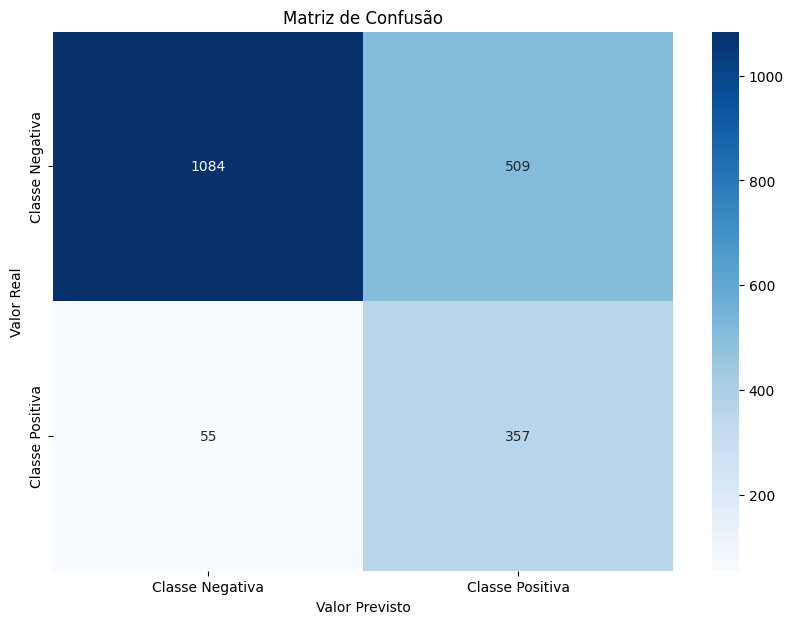

Relatório de Classificação:
               precision    recall  f1-score   support

    Classe 0       0.95      0.68      0.79      1593
    Classe 1       0.41      0.87      0.56       412

    accuracy                           0.72      2005
   macro avg       0.68      0.77      0.68      2005
weighted avg       0.84      0.72      0.75      2005



In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Certifique-se de que X_test e Y_test tenham a forma correta
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de Y_test: {Y_test.shape}")

# Verifique se X_test não está vazio
if X_test.size == 0:
    raise ValueError("X_test está vazio")

# Realize a predição
previsoes = model.predict(X_test)

# Verifique a forma das previsões
print(f"Forma das previsões: {previsoes.shape}")

# Converta as previsões para binário
previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

# Avaliação da acurácia
acuracia = accuracy_score(Y_test, previsoes_binarias)
print(f"Acurácia no conjunto de teste: {acuracia}")

# Matriz de Confusão
matriz_confusao = confusion_matrix(Y_test, previsoes_binarias)
print("Matriz de Confusão:\n", matriz_confusao)

# Plot da Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe Negativa", "Classe Positiva"], yticklabels=["Classe Negativa", "Classe Positiva"])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# Relatório de Classificação
relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"])
print("Relatório de Classificação:\n", relatorio_classificacao)


In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

def train_model(model, X_train, Y_train, EPOCHS=30):
    # Usando 'val_accuracy' em vez de 'val_acc'
    early_stop = EarlyStopping(monitor='val_accuracy', patience=10,verbose=1,
                               mode='max', restore_best_weights=True)

    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5,
                                  verbose=1, mode='max', min_lr=1e-5)

    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size=16,
                        epochs=EPOCHS,
                        callbacks=[reduce_lr, early_stop])
    return history


In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

def create_resnet50_L():
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.25)(x)
        x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.3)(x)
        predictions = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(x)
        model = Model(inputs=base_model.input, outputs=predictions)

        for layer in base_model.layers:
            layer.trainable = True
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        return model


In [18]:
bf = 1 

melor fold = 2
OIBOMDIA 0
Epoch 1/30
  2/436 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.4688 - loss: 14.4231   

I0000 00:00:1721700998.499828     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721700998.597791     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6363 - loss: 9.6451

W0000 00:00:1721701059.292468     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 134s 143ms/step - accuracy: 0.6363 - loss: 9.6377 - val_accuracy: 0.5602 - val_loss: 3.9420 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.6926 - loss: 1.8446 - val_accuracy: 0.6898 - val_loss: 0.9842 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7211 - loss: 0.8313 - val_accuracy: 0.6938 - val_loss: 0.9864 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7186 - loss: 0.6527 - val_accuracy: 0.7036 - val_loss: 0.7833 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7255 - loss: 0.5913 - val_accuracy: 0.5763 - val_loss: 0.7324 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7318 - loss: 0.5990 - val_accuracy: 0.5011 - val_loss: 8.7485 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7049 - loss: 0.62

W0000 00:00:1721701585.142048     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step
Precisão : 0.7223453595039204
Recall : 0.8173075165011976
F1-Score : 0.7364501789703535
OIBOMDIA 1
Epoch 1/30
  4/436 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.5000 - loss: 14.3191 

W0000 00:00:1721701658.590959     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6547 - loss: 9.3342

W0000 00:00:1721701711.274443     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 118s 125ms/step - accuracy: 0.6548 - loss: 9.3263 - val_accuracy: 0.6680 - val_loss: 4.3496 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7138 - loss: 1.3447 - val_accuracy: 0.7013 - val_loss: 0.9009 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7319 - loss: 0.6809 - val_accuracy: 0.6800 - val_loss: 0.6943 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7617 - loss: 0.5681 - val_accuracy: 0.7586 - val_loss: 0.6319 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7566 - loss: 0.5451 - val_accuracy: 0.7036 - val_loss: 0.5603 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7788 - loss: 0.5254 - val_accuracy: 0.6244 - val_loss: 1.5199 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7774 - loss: 0.50

W0000 00:00:1721702150.937244     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step
Precisão : 0.7067473643981314
Recall : 0.8099200689911568
F1-Score : 0.705446207072419
OIBOMDIA 2
Epoch 1/30
  4/436 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.5417 - loss: 14.1870  

W0000 00:00:1721702223.637608     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6674 - loss: 9.2174

W0000 00:00:1721702276.525830     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 118s 126ms/step - accuracy: 0.6675 - loss: 9.2095 - val_accuracy: 0.7242 - val_loss: 1.7351 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.6889 - loss: 1.3906 - val_accuracy: 0.7208 - val_loss: 0.7431 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7181 - loss: 0.7054 - val_accuracy: 0.7110 - val_loss: 0.7173 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.7225 - loss: 0.5968 - val_accuracy: 0.5539 - val_loss: 0.8451 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7301 - loss: 0.5701 - val_accuracy: 0.7460 - val_loss: 0.5574 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7642 - loss: 0.5255 - val_accuracy: 0.5889 - val_loss: 0.6209 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7727 - loss: 0.50

W0000 00:00:1721702777.772532     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step
Precisão : 0.7354127925749423
Recall : 0.8043777692453026
F1-Score : 0.7559393916128497
OIBOMDIA 3
Epoch 1/30
  4/436 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.5273 - loss: 14.2111 

W0000 00:00:1721702849.997771     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6527 - loss: 9.2801

W0000 00:00:1721702902.434583     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 117s 125ms/step - accuracy: 0.6527 - loss: 9.2724 - val_accuracy: 0.6841 - val_loss: 2.0014 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.6920 - loss: 1.4641 - val_accuracy: 0.6686 - val_loss: 0.9045 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.6988 - loss: 0.7881 - val_accuracy: 0.5843 - val_loss: 0.7708 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7217 - loss: 0.6062 - val_accuracy: 0.6726 - val_loss: 0.6710 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7348 - loss: 0.5839 - val_accuracy: 0.6525 - val_loss: 0.6395 - learning_rate: 0.0010
Epoch 6/30
435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7425 - loss: 0.5577
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7425 - loss: 0.557

W0000 00:00:1721703386.481697     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step
Precisão : 0.7286066355793788
Recall : 0.8117842624589374
F1-Score : 0.7476309495981155
OIBOMDIA 4
Epoch 1/30
  4/436 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.5365 - loss: 14.1358  

W0000 00:00:1721703461.372141     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6473 - loss: 9.5373

W0000 00:00:1721703514.134345     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 118s 125ms/step - accuracy: 0.6474 - loss: 9.5295 - val_accuracy: 0.5470 - val_loss: 2.6881 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.6901 - loss: 1.5082 - val_accuracy: 0.6806 - val_loss: 0.8599 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7237 - loss: 0.7181 - val_accuracy: 0.7483 - val_loss: 0.6068 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7336 - loss: 0.5882 - val_accuracy: 0.6502 - val_loss: 0.8254 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7616 - loss: 0.5623 - val_accuracy: 0.5356 - val_loss: 0.8445 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7610 - loss: 0.5739 - val_accuracy: 0.7162 - val_loss: 0.6497 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7708 - loss: 0.55

W0000 00:00:1721704021.414864     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step
Precisão : 0.7390986861787281
Recall : 0.8190452464971142
F1-Score : 0.760109381640885
OIBOMDIA 5
Epoch 1/30
  4/436 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.4974 - loss: 14.1880  

W0000 00:00:1721704094.504485     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6486 - loss: 9.1651

W0000 00:00:1721704147.663643     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 118s 126ms/step - accuracy: 0.6486 - loss: 9.1574 - val_accuracy: 0.6858 - val_loss: 1.9386 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7102 - loss: 1.4585 - val_accuracy: 0.7133 - val_loss: 0.7709 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7181 - loss: 0.7139 - val_accuracy: 0.7443 - val_loss: 0.6713 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7582 - loss: 0.5922 - val_accuracy: 0.6445 - val_loss: 0.6637 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7545 - loss: 0.5677 - val_accuracy: 0.7575 - val_loss: 0.5472 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7708 - loss: 0.5299 - val_accuracy: 0.7013 - val_loss: 0.6592 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7503 - loss: 0.56

W0000 00:00:1721704610.994285     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step
Precisão : 0.7277946054622884
Recall : 0.8155713101615685
F1-Score : 0.7457854689605221
OIBOMDIA 6
Epoch 1/30
  3/436 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.6667 - loss: 14.1709  

W0000 00:00:1721704684.392469     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6741 - loss: 9.2810

W0000 00:00:1721704738.393998     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 119s 128ms/step - accuracy: 0.6742 - loss: 9.2733 - val_accuracy: 0.6869 - val_loss: 2.0759 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7016 - loss: 1.4845 - val_accuracy: 0.7185 - val_loss: 0.8497 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7136 - loss: 0.7502 - val_accuracy: 0.7047 - val_loss: 0.6686 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7410 - loss: 0.5829 - val_accuracy: 0.7190 - val_loss: 0.6443 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7394 - loss: 0.5816 - val_accuracy: 0.7253 - val_loss: 0.5887 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7621 - loss: 0.5442 - val_accuracy: 0.7511 - val_loss: 0.5909 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7772 - loss: 0.52

W0000 00:00:1721705226.041194     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step
Precisão : 0.7441520779707136
Recall : 0.8138983355578715
F1-Score : 0.7655519949037553
OIBOMDIA 7
Epoch 1/30
  4/436 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.4974 - loss: 14.2514  

W0000 00:00:1721705301.158348     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6695 - loss: 9.2700

W0000 00:00:1721705355.380307     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 120s 129ms/step - accuracy: 0.6695 - loss: 9.2622 - val_accuracy: 0.6800 - val_loss: 1.8550 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7195 - loss: 1.3900 - val_accuracy: 0.6835 - val_loss: 0.8092 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7483 - loss: 0.6717 - val_accuracy: 0.6978 - val_loss: 0.6571 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7644 - loss: 0.5587 - val_accuracy: 0.6479 - val_loss: 0.8418 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7768 - loss: 0.5481 - val_accuracy: 0.7070 - val_loss: 0.8575 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7740 - loss: 0.5459 - val_accuracy: 0.5803 - val_loss: 1.8958 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7934 - loss: 0.52

W0000 00:00:1721705819.398627     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step
Precisão : 0.7110053611790859
Recall : 0.80979512917558
F1-Score : 0.7178463229612794
OIBOMDIA 8
Epoch 1/30
  3/436 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.4618 - loss: 14.3387  

W0000 00:00:1721705894.863510     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6769 - loss: 9.0063

W0000 00:00:1721705948.645919     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 120s 128ms/step - accuracy: 0.6769 - loss: 8.9984 - val_accuracy: 0.7299 - val_loss: 1.9164 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7119 - loss: 1.2666 - val_accuracy: 0.6714 - val_loss: 1.0212 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7267 - loss: 0.6862 - val_accuracy: 0.7156 - val_loss: 0.6150 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7238 - loss: 0.5815 - val_accuracy: 0.7196 - val_loss: 0.6135 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7540 - loss: 0.5565 - val_accuracy: 0.7414 - val_loss: 0.5559 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7597 - loss: 0.5330 - val_accuracy: 0.7844 - val_loss: 0.5434 - learning_rate: 0.0010
Epoch 7/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7840 - loss: 0.52

W0000 00:00:1721706411.156673     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step
Precisão : 0.7230714317726373
Recall : 0.8185211087342072
F1-Score : 0.7371947045716033
OIBOMDIA 9
Epoch 1/30
  4/436 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.5898 - loss: 14.1918  

W0000 00:00:1721706486.229117     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6534 - loss: 9.4679

W0000 00:00:1721706539.855812     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


436/436 ━━━━━━━━━━━━━━━━━━━━ 119s 128ms/step - accuracy: 0.6535 - loss: 9.4603 - val_accuracy: 0.5212 - val_loss: 5.3781 - learning_rate: 0.0010
Epoch 2/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7027 - loss: 1.6394 - val_accuracy: 0.7122 - val_loss: 1.0964 - learning_rate: 0.0010
Epoch 3/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7188 - loss: 0.7480 - val_accuracy: 0.6950 - val_loss: 0.7670 - learning_rate: 0.0010
Epoch 4/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7282 - loss: 0.6265 - val_accuracy: 0.6789 - val_loss: 0.7294 - learning_rate: 0.0010
Epoch 5/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7447 - loss: 0.5733 - val_accuracy: 0.6451 - val_loss: 1.6742 - learning_rate: 0.0010
Epoch 6/30
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.7444 - loss: 0.5705 - val_accuracy: 0.7104 - val_loss: 0.6168 - learning_rate: 0.0010
Epoch 7/30
435/436 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7626 - loss: 0.563

W0000 00:00:1721707008.222574     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step
Precisão : 0.7284753574734883
Recall : 0.8173707482371296
F1-Score : 0.7463531278197966
Acurácia média: 0.7922693266832918 ± 0.023037049611779277
Precisão média: 0.7266709672093314 ± 0.011039704890978736
Recall médio: 0.8137591495560066 ± 0.00449354426528098
F1-Score médio: 0.741830772811158 ± 0.017649716109403392


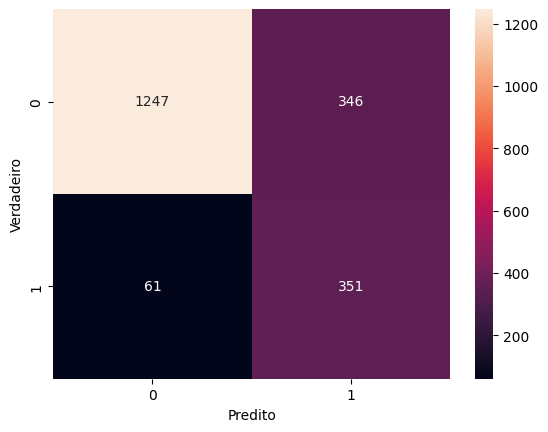

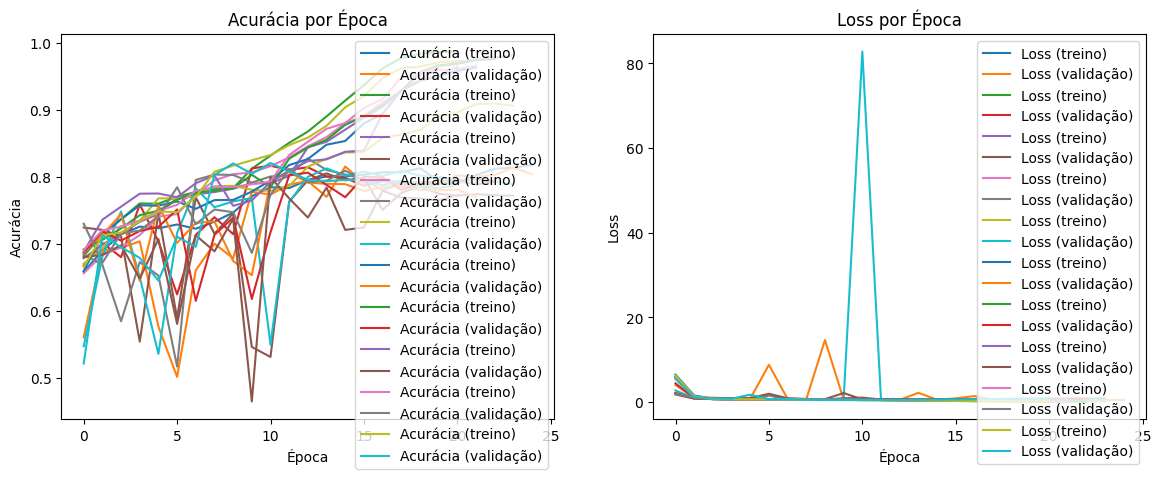

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importe a biblioteca NumPy

# Listas para armazenar as métricas de cada iteração
accuracies = []
precisions = []
recalls = []
f1_scores = []
historys = []
if(bf==0):
    treinox = x_train_1
    treinoy = y_train_1
    print("melor fold = 1")
elif(bf==1):
    treinox = x_train_2
    treinoy = y_train_2
    print("melor fold = 2")
else:
    treinox = x_train_3
    treinoy = y_train_3
    print("melor fold = 3")

for i in range(10):
    print("OIBOMDIA",i)
    tf.keras.backend.clear_session()
    model = create_resnet50_L()
    historys.append(train_model(model, treinox, treinoy, 30))

    previsoes = model.predict(X_test)
    previsoes_binarias = [1 if x > 0.5 else 0 for x in previsoes]

    # Adiciona a acurácia à lista
    acuracia = accuracy_score(Y_test, previsoes_binarias)
    accuracies.append(acuracia)

    # Calcula e adiciona precisão, recall e f1-score à suas respectivas listas
    relatorio_classificacao = classification_report(Y_test, previsoes_binarias, target_names=["Classe 0", "Classe 1"], output_dict=True)
    # Capturando os valores individuais de precisão, recall e F1-score para a classe '1'
    precisao_classe_1 = relatorio_classificacao['macro avg']['precision']
    recall_classe_1 = relatorio_classificacao['macro avg']['recall']
    f1_score_classe_1 = relatorio_classificacao['macro avg']['f1-score']

    print(f"Precisão : {precisao_classe_1}")
    print(f"Recall : {recall_classe_1}")
    print(f"F1-Score : {f1_score_classe_1}")

    precisions.append(precisao_classe_1)
    recalls.append(recall_classe_1)
    f1_scores.append(f1_score_classe_1)


# Calcula a média de cada métrica
acuracia_media = np.mean(accuracies)
precisao_media = np.mean(precisions)
recall_medio = np.mean(recalls)
f1_score_medio = np.mean(f1_scores)

# Calcula o desvio padrão de cada métrica
acuracia_dp = np.std(accuracies)
precisao_dp = np.std(precisions)
recall_dp = np.std(recalls)
f1_score_dp = np.std(f1_scores)

# Exibe os resultados
print(f"Acurácia média: {acuracia_media} ± {acuracia_dp}")
print(f"Precisão média: {precisao_media} ± {precisao_dp}")
print(f"Recall médio: {recall_medio} ± {recall_dp}")
print(f"F1-Score médio: {f1_score_medio} ± {f1_score_dp}")

# Opção para plotar a matriz de confusão da última iteração
cm = confusion_matrix(Y_test, previsoes_binarias)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

import matplotlib.pyplot as plt

# Configuração do gráfico de Acurácia
plt.figure(figsize=(14, 5))

# Gráfico de Acurácia por Época para cada history
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
for history in historys:
    plt.plot(history.history['accuracy'], label='Acurácia (treino)')
    plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

# Configuração do gráfico de Loss
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
for history in historys:
    plt.plot(history.history['loss'], label='Loss (treino)')
    plt.plot(history.history['val_loss'], label='Loss (validação)')
plt.title('Loss por Época')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
#model.save_weights('/kaggle/working/VGG-16.weights.h5')